# Detection of Cyberattacks on the IoFT (Plots)
Notebook used to plot the results of the Centralized Training and the Federated Training.

## How to use

1. Firts train the centralized and federated models, through their respective notebooks (https://github.com/AndreMoukarzel/Detection-of-Cyberattacks-on-the-Internet-of-Flying-Things-Using-Federated-Learning).


2. Json files will be produced on your GDrive. Create a folder and add them there.

3. Add the path to the folder, between the quotation marks below.

In [ ]:
#probably something like /content/drive/My Drive/something-else-here/ECU-IoFT.csv
#if you are not sure, try using !ls , !pwd and !cd
drive_path = ""

4. Run the cells throughout the notebook individually or run all of them (ctrl+F9). You will be asked to grant access to your Drive.

## Plots

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
def get_all_files(path: str) -> dict:
    models_data = {}
    model_names = ["binary_fed", "binary_fed_bagged", "multiclass_fed", "multiclass_fed_bagged"]

    for i in [3, 5, 10]:
        for name in model_names:
            try:
                with open(path + '/' + name + str(i) + ".json", "r") as f:
                    models_data[name + str(i)] = json.load(f)
            except FileNotFoundError:
                pass
    
    with open(path + '/' + "multiclass_fed_bagged10_smallmodel.json", "r") as f:
        models_data["multiclass_fed_bagged10_smallmodel"] = json.load(f)
    with open(path + '/' + "binary_cen.json", "r") as f:
        models_data["binary_cen"] = json.load(f)
    with open(path + '/' + "binary_cen_small.json", "r") as f:
        models_data["binary_cen_small"] = json.load(f)
    with open(path + '/' + "classes_cen.json", "r") as f:
        models_data["multiclass_cen"] = json.load(f)
    with open(path + '/' + "classes_cen_small.json", "r") as f:
        models_data["multiclass_cen_small"] = json.load(f)

    return models_data


def get_results() -> list:
    return get_all_files(drive_path)

In [ ]:
models_data = get_results()

plot_x = [i for i in range(1000)]

In [ ]:
print("final accs")
for model in models_data.keys():
    print(model + ": " + str(models_data[model]["acc"][-1]))

print("final losses")
for model in models_data.keys():
    print(model + ": " + str(models_data[model]["loss"][-1]))

final accs
binary_fed3: 0.9701175093650818
binary_fed_bagged3: 0.9799402356147766
multiclass_fed3: 0.9046865105628967
multiclass_fed_bagged3: 0.9083164930343628
binary_fed5: 0.9247381091117859
binary_fed_bagged5: 0.9802899360656738
multiclass_fed5: 0.8047794103622437
multiclass_fed_bagged5: 0.8444699048995972
binary_fed10: 0.9315133690834045
binary_fed_bagged10: 0.982840895652771
multiclass_fed10: 0.8426780104637146
multiclass_fed_bagged10: 0.9097204208374023
multiclass_fed_bagged10_smallmodel: 0.9102603197097778
binary_cen: 0.9828183650970459
binary_cen_small: 0.9771059155464172
multiclass_cen: 0.9102379083633423
multiclass_cen_small: 0.9474674463272095
final losses
binary_fed3: 0.11855677515268326
binary_fed_bagged3: 0.08146699517965317
multiclass_fed3: 0.26202157139778137
multiclass_fed_bagged3: 0.23094479739665985
binary_fed5: 0.16118310391902924
binary_fed_bagged5: 0.0879845917224884
multiclass_fed5: 1.1610639095306396
multiclass_fed_bagged5: 1.154685378074646
binary_fed10: 0.2636

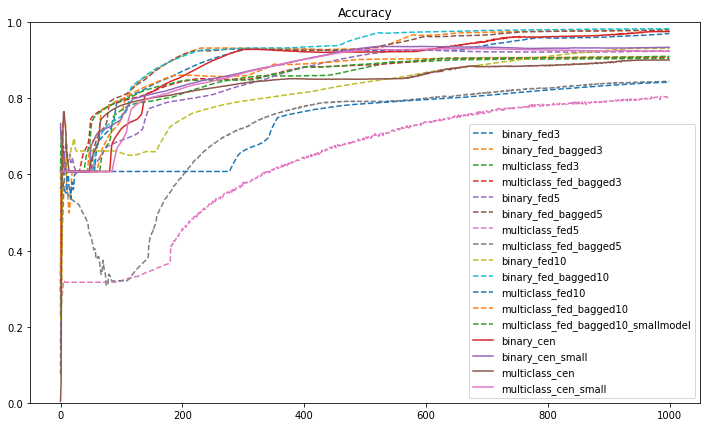

In [ ]:
plt.figure(figsize=(12, 7))

for model in models_data.keys():
    if "fed" in model.lower():
        plt.plot(plot_x, models_data[model]["acc"], label=model, linestyle="dashed")
    else:
        plt.plot(plot_x, models_data[model]["acc"][:1000], label=model)

plt.title("Accuracy")
plt.ylim([0, 1])
plt.legend()
plt.show()

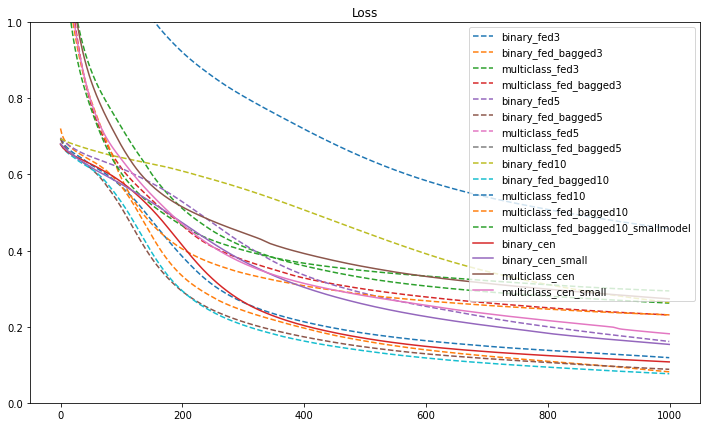

In [ ]:
plt.figure(figsize=(12, 7))

for model in models_data.keys():
    if "fed" in model.lower():
        plt.plot(plot_x, models_data[model]["loss"], label=model, linestyle="dashed")
    else:
        plt.plot(plot_x, models_data[model]["loss"][:1000], label=model)

plt.title("Loss")
plt.ylim([0, 1])
plt.legend()
plt.show()

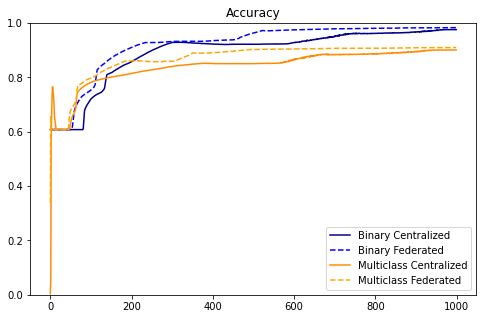

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(plot_x, models_data["binary_cen"]["acc"][:1000], label="Binary Centralized", color="darkblue")
plt.plot(plot_x, models_data["binary_fed_bagged10"]["acc"], label="Binary Federated", linestyle="dashed", color="blue")
plt.plot(plot_x, models_data["multiclass_cen"]["acc"][:1000], label="Multiclass Centralized", color="darkorange")
plt.plot(plot_x,models_data["multiclass_fed_bagged10"]["acc"], label="Multiclass Federated", linestyle="dashed", color="orange")

plt.title("Accuracy")
plt.ylim([0, 1])
plt.legend()
plt.show()

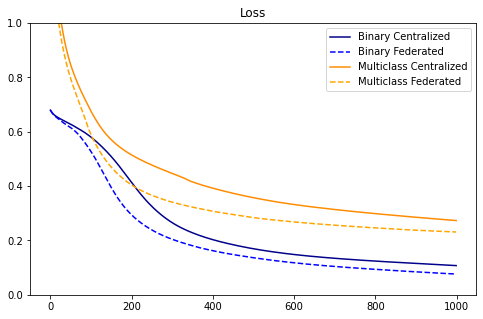

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(plot_x, models_data["binary_cen"]["loss"][:1000], label="Binary Centralized", color="darkblue")
plt.plot(plot_x, models_data["binary_fed_bagged10"]["loss"], label="Binary Federated", linestyle="dashed", color="blue")
plt.plot(plot_x, models_data["multiclass_cen"]["loss"][:1000], label="Multiclass Centralized", color="darkorange")
plt.plot(plot_x,models_data["multiclass_fed_bagged10"]["loss"], label="Multiclass Federated", linestyle="dashed", color="orange")

plt.title("Loss")
plt.ylim([0, 1])
plt.legend()
plt.show()